In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from PIL import Image
import os

from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# !unzip './datasets_benar_coba_upload.zip'
# !unzip './test_data.zip'


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [44]:
data_dir = './datasets_benar_coba_upload'
test_dir = './test_data'

In [45]:

img_augmentation = tf.keras.models.Sequential(
    [
        tf.keras.layers.RandomRotation(factor=0.40), # 0.4 * 2 * pi
        tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        tf.keras.layers.RandomFlip(),
        tf.keras.layers.RandomContrast(factor=0.1),
        tf.keras.layers.RandomZoom(.5, .4),
        tf.keras.layers.RandomBrightness(factor=0.2)

    ],
    name='img_augmentation'
)

In [46]:
cbCheckpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath='model_keras_dataset.{epoch:02d}-{val_loss:.2f}.keras',
        save_best_only=True,
        monitor="val_loss")
cbEvalAcc =   tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", 
        patience=5, 
    )

In [47]:
from tensorflow.keras.applications import EfficientNetV2M


# BASE_MODEL_PATH 
base_model_M = EfficientNetV2M(include_top=False, weights='imagenet', classes=58)
base_model_M.summary()
base_model_M.trainable = False

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 24)       648       ['rescaling_1[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, None, None, 24)       96        ['stem_conv[0][0]']           
 n)                                                                                

In [28]:

# """
# coba ganti ke RMSPRop kaya di paper efficientNetv2
# RMSProp optimizer with decay 0.9 and
# momentum 0.9; batch norm momentum 0.99; weight decay 1e-5. Each model is trained for 350 epochs with total
# batch size 4096. Learning rate is first warmed up from 0
# to 0.256, and then decayed by 0.97 every 2.4 epochs. We
# use exponential moving average with 0.9999 decay rate,
# """
# def best_model_EffM():
#         inputs = base_model_M.input
#         x = img_augmentation(inputs)

#         x = base_model_M(x, training=False)

#         x = tf.keras.layers.GlobalAveragePooling2D()(x)
#         x = tf.keras.layers.Dense(units=512, activation='relu')(x)
#         x = tf.keras.layers.Dropout(0.3)(x)


#         outputs =tf.keras.layers.Dense(58, activation='softmax')(x)
#         model = tf.keras.Model(inputs, outputs)
#         model.summary()

#         model.compile(
#             optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),  
#             loss = tf.keras.losses.CategoricalCrossentropy(),
#             metrics = ['accuracy']
#         )
#         return model

In [29]:
# start = time.time()
# cbCheckpointBestM = tf.keras.callbacks.ModelCheckpoint(
#         filepath='model_keras_tuner_batchNorm_512_32_EffM.{epoch:02d}-{val_loss:.2f}.keras',
#         save_best_only=True,
#         monitor="val_loss")

# model_EffM_best = best_model_EffM()

# hist_effM = model_EffM_best.fit(train_data, epochs=epochs, validation_data=val_data, verbose=1, callbacks=[cbEvalAcc, cbCheckpoint, lr_rate])
# # 0.8083
# end = time.time()
# print("The time of execution of above program is :",
#       (end-start), "s")

In [48]:
def save_plot_loss(H, path):
    print("min val_loss: ", min(H.history["val_loss"]))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")

    plt.title("Training Loss ")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(path)

    
def save_plot_acc(H, path):
    print("max val_accuracy: " , max(H.history["val_accuracy"]))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title(" Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(path)

In [31]:
# save_plot_loss(hist_effM, "thirtytwo_batch_size_512_loss_effM_3")
# save_plot_acc(hist_effM,  "thirtytwo_batch_size_512_acc_effM_3")

# Evaluate

In [16]:
# y_true,y_pred=labels_confusion_matrix()


In [17]:
# print_confusion_matrix(y_true,y_pred)


In [14]:
test_data =  image_dataset_from_directory(test_dir, image_size = (320,320), batch_size = 16, label_mode = 'categorical')

Found 752 files belonging to 58 classes.


In [46]:
# model_EffM_best.evaluate(test_data)

In [15]:
"""
efficientNetM: 
min imageSize= 128
max imageSize= 380
"""

train_data_big = image_dataset_from_directory(data_dir, image_size = (320,320), batch_size = 32, label_mode = 'categorical', validation_split=0.2,
                                        subset = 'training', seed=42)

val_data_big = image_dataset_from_directory(data_dir, image_size = (320,320), batch_size = 32, label_mode = 'categorical', validation_split=0.2,
                                        subset = 'validation', seed=42)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data_big = train_data_big.prefetch(buffer_size=AUTOTUNE)

test_data_big =  image_dataset_from_directory(test_dir, image_size = (320,320), batch_size = 32, label_mode = 'categorical')

Found 11595 files belonging to 58 classes.
Using 9276 files for training.
Found 11595 files belonging to 58 classes.
Using 2319 files for validation.
Found 752 files belonging to 58 classes.


In [26]:

"""
coba ganti ke RMSPRop kaya di paper efficientNetv2

RMSProp optimizer with decay 0.9 and
momentum 0.9; batch norm momentum 0.99; weight decay 1e-5. Each model is trained for 350 epochs with total
batch size 4096. Learning rate is first warmed up from 0
to 0.256, and then decayed by 0.97 every 2.4 epochs. We
use exponential moving average with 0.9999 decay rate, (EfficientNetV2: Smaller Models and Faster Training)
"""
initial_learning_rate =  0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=696, #  decayed 0.97 every 2.4 epochs (1 batch = 290 steps) 
    decay_rate=0.97, 
    staircase=True)

def best_model_EffM_RMS(momentum):
        inputs = base_model_M.input
        x = img_augmentation(inputs)

        x = base_model_M(x, training=False)

        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = tf.keras.layers.Dense(units=512, activation='relu')(x)
        x = tf.keras.layers.Dropout(0.3)(x)


        outputs =tf.keras.layers.Dense(58, activation='softmax')(x)
        model = tf.keras.Model(inputs, outputs)
        model.summary()

        model.compile(
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, 
                                                   momentum=momentum, # mungkin 0.1
                                                   weight_decay=1e-5,
                                                   use_ema=True),  
            loss = tf.keras.losses.CategoricalCrossentropy(),
            metrics = ['accuracy']
        )
        return model

In [31]:
# start = time.time()
# cbCheckpointBestM = tf.keras.callbacks.ModelCheckpoint(
#         filepath='model_bestRMS.{epoch:02d}-{val_loss:.2f}.keras',
#         save_best_only=True,
#         monitor="val_loss")

# epochs=100
# model_EffM_best = best_model_EffM_RMS(0.9)



# hist_effM_big = model_EffM_best.fit(train_data_big, epochs=epochs, validation_data=val_data_big, verbose=1, callbacks=[cbEvalAcc, cbCheckpoint])

# end = time.time()
# print("The time of execution of above program is :",
#       (end-start), "s")

In [34]:
# save_plot_loss(hist_effM_big, "thirtytwo_batch_size_512_loss_effM_3")
# save_plot_acc(hist_effM_big,  "thirtytwo_batch_size_512_acc_effM_3")

In [ ]:
start = time.time()
cbCheckpointBestM = tf.keras.callbacks.ModelCheckpoint(
        filepath='model_bestRMS.{epoch:02d}-{val_loss:.2f}.keras',
        save_best_only=True,
        monitor="val_loss")

epochs=100
model_EffM_best = best_model_EffM_RMS(0.1)

# sebelumnya di code diatas paling bagus 81%

hist_effM_big = model_EffM_best.fit(train_data_big, epochs=epochs, validation_data=val_data_big, verbose=1, callbacks=[cbEvalAcc, cbCheckpoint])

end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 img_augmentation (Sequenti  (None, None, None, 3)     0         
 al)                                                             
                                                                 
 efficientnetv2-m (Function  (None, None, None, 1280   53150388  
 al)                         )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                             

2024-09-25 14:38:21.482389: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-25 14:38:29.194360: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f28e575cca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-25 14:38:29.194415: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P5000, Compute Capability 6.1
2024-09-25 14:38:29.201732: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727275109.293326     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


290/290 [==============================] - ETA: 0s - loss: 2.0666 - accuracy: 0.4793WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f2de2519940> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7f2de2519940>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7f2de2519940>. Note that functions defined in certain environments, like the interactive Python shell, do

In [ ]:
# save_plot_loss(hist_effM_big, "thirtytwo_batch_size_512_loss_effM_3")
# save_plot_acc(hist_effM_big,  "thirtytwo_batch_size_512_acc_effM_3")

In [38]:
# model_from_disk = tf.keras.models.load_model('model_keras_dataset.46-0.52.keras')

In [48]:
# model_from_disk.save('best_model.keras')
start = time.time()
cbCheckpointBestM = tf.keras.callbacks.ModelCheckpoint(
        filepath='model_bestRMS.{epoch:02d}-{val_loss:.2f}.keras',
        save_best_only=True,
        monitor="val_loss")

epochs=30
model_EffM_best =  tf.keras.models.load_model('best_model_1.keras')

# sebelumnya di code diatas paling bagus 81%
# 0.0005 -> 84.61%

hist_effM_big = model_EffM_best.fit(train_data_big, epochs=epochs, validation_data=val_data_big, verbose=1, callbacks=[cbEvalAcc, cbCheckpoint])

end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")

Epoch 1/30
290/290 [==============================] - 112s 325ms/step - loss: 0.5986 - accuracy: 0.8179 - val_loss: 0.5768 - val_accuracy: 0.8262
Epoch 2/30
290/290 [==============================] - 89s 305ms/step - loss: 0.5783 - accuracy: 0.8238 - val_loss: 0.5621 - val_accuracy: 0.8314
Epoch 3/30
290/290 [==============================] - 86s 296ms/step - loss: 0.5924 - accuracy: 0.8208 - val_loss: 0.5633 - val_accuracy: 0.8279
Epoch 4/30
290/290 [==============================] - 89s 305ms/step - loss: 0.5736 - accuracy: 0.8207 - val_loss: 0.5551 - val_accuracy: 0.8340
Epoch 5/30
290/290 [==============================] - 87s 299ms/step - loss: 0.5778 - accuracy: 0.8260 - val_loss: 0.5556 - val_accuracy: 0.8335
Epoch 6/30
290/290 [==============================] - 92s 316ms/step - loss: 0.5626 - accuracy: 0.8305 - val_loss: 0.5519 - val_accuracy: 0.8366
Epoch 7/30
290/290 [==============================] - 93s 320ms/step - loss: 0.5493 - accuracy: 0.8354 - val_loss: 0.5391 - val_a

In [49]:
model_EffM_best.save('best_model_3.h5')

In [50]:
model_EffM_best.save('best_model_new_3.keras')

In [21]:
# import joblib

# # Save the model
# joblib.dump(model_EffM_best, "model.pkl")
# joblib.load("model.pkl")

In [20]:
# start = time.time()
# epochs = 50
# hist_effM_big = model_from_disk.fit(train_data_big, epochs=epochs, validation_data=val_data_big, verbose=1, callbacks=[cbEvalAcc, cbCheckpoint])
# end = time.time()
# print("The time of execution of above program is :",
#       (end-start), "s")

Epoch 1/50


2024-09-25 11:23:34.835416: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-25 11:23:40.492591: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fad119dd090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-25 11:23:40.492645: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-09-25 11:23:40.514424: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727263420.622623     942 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


290/290 [==============================] - 123s 330ms/step - loss: 0.5152 - accuracy: 0.8426 - val_loss: 0.5368 - val_accuracy: 0.8409
Epoch 2/50
290/290 [==============================] - 89s 304ms/step - loss: 0.5062 - accuracy: 0.8427 - val_loss: 0.5284 - val_accuracy: 0.8426
Epoch 3/50
290/290 [==============================] - 88s 303ms/step - loss: 0.5079 - accuracy: 0.8409 - val_loss: 0.5235 - val_accuracy: 0.8409
Epoch 4/50
290/290 [==============================] - 89s 305ms/step - loss: 0.5005 - accuracy: 0.8421 - val_loss: 0.5168 - val_accuracy: 0.8383
Epoch 5/50
290/290 [==============================] - 85s 294ms/step - loss: 0.4966 - accuracy: 0.8473 - val_loss: 0.5301 - val_accuracy: 0.8430
Epoch 6/50
290/290 [==============================] - 85s 293ms/step - loss: 0.4869 - accuracy: 0.8518 - val_loss: 0.5290 - val_accuracy: 0.8435
Epoch 7/50
290/290 [==============================] - 85s 292ms/step - loss: 0.5052 - accuracy: 0.8418 - val_loss: 0.5224 - val_accuracy: 0.

In [21]:
# model_from_disk.save('best_model.keras')

In [22]:
# model_from_disk.save('best_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
allfoodNameDF =   pd.read_csv("all_food_names.csv")

foodLabels = allfoodNameDF.values.tolist()

2024-09-26 09:20:27.345210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-09-26 09:20:28.164902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-09-26 09:20:28.164990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


1/1 [==============================] - 0s 101ms/step


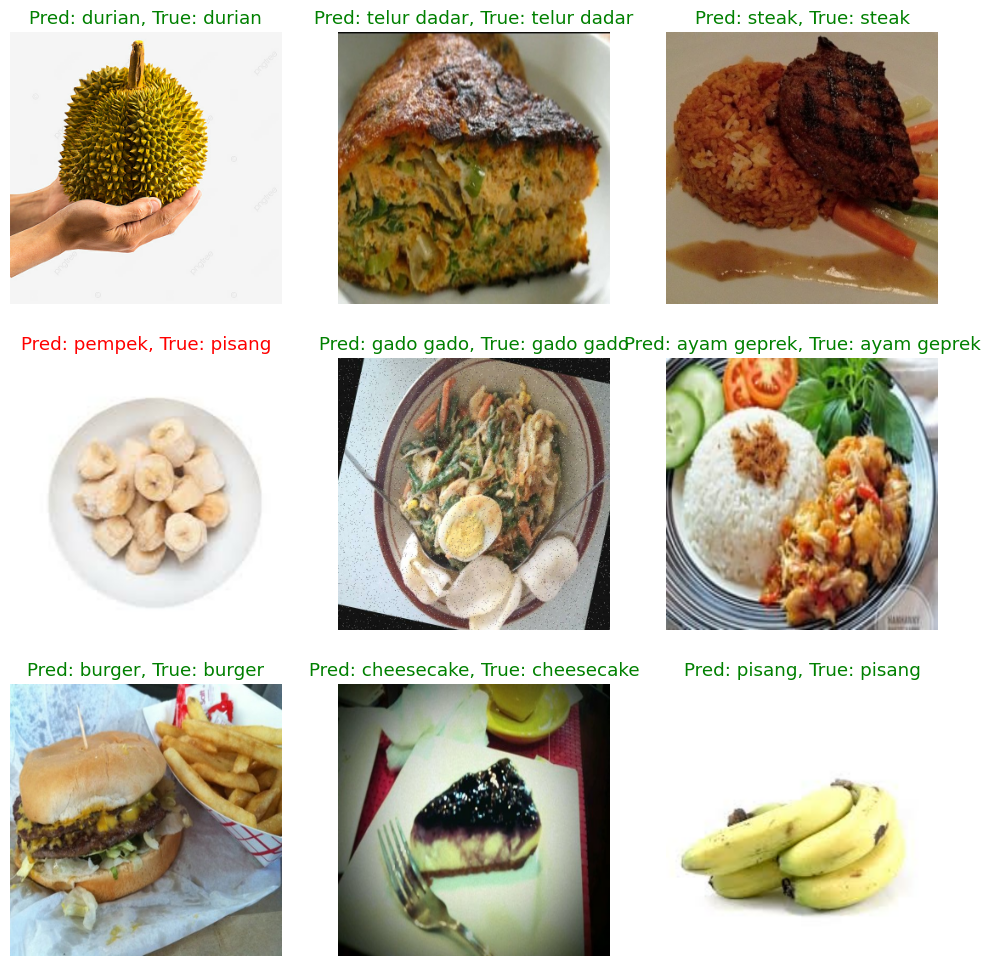

In [78]:


test_data = test_data.shuffle(buffer_size=1000)

for images, labels in test_data.take(1):
    # Melakukan prediksi
    predictions = model_from_disk.predict(images)
    
    # Mengambil kelas prediksi dan true label
    predicted_labels = tf.argmax(predictions, axis=1)
    true_labels = tf.argmax(labels, axis=1)
    color = ""
    
    

    # Menampilkan beberapa gambar, hasil prediksi, dan true label
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Menampilkan 9 gambar pertama
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if foodLabels[predicted_labels[i]][1] ==  foodLabels[true_labels[i]][1]:
            color = "green"
        else:
            color = "red"
        plt.title(f"Pred: {foodLabels[predicted_labels[i]][1]}, True: {foodLabels[true_labels[i]][1]}" , color=color)
        plt.axis("off")

    plt.show()

In [55]:
model_EffM_best.evaluate(test_data)

2024-09-26 05:47:18.428613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-09-26 05:47:18.973044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-09-26 05:47:18.973123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


47/47 [==============================] - 8s 120ms/step - loss: 0.5807 - accuracy: 0.8205


[0.5806507468223572, 0.8204787373542786]

In [12]:
model_from_disk = tf.keras.models.load_model('best_model.keras')

In [19]:
model_from_disk.evaluate(test_data)

2024-09-26 08:08:26.186128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-09-26 08:08:27.068322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-09-26 08:08:27.068391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


47/47 [==============================] - 16s 138ms/step - loss: 0.5661 - accuracy: 0.8324


[0.5660640001296997, 0.832446813583374]

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.preprocessing import image
import seaborn as sns

def labels_confusion_matrix():
    folder_path="./test_data"
    food_map = {}
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        food_map[i] = j 
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        print("true: ", true)
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):
            
            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(320, 320))
            
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            prediction = model_from_disk.predict(img_processed)
            
            index = np.argmax(prediction[0])
            
            print("index: ", food_map[index])
            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):

    cmap="viridis"
    cm_plot_labels = [i for i in range(58)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.1)
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm, annot=True,cmap=cmap) 

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [74]:
y_true,y_pred=labels_confusion_matrix()


true:  ayam goreng
1/1 [==============================] - 0s 44ms/step
index:  telur balado
1/1 [==============================] - 0s 58ms/step
index:  ayam goreng
1/1 [==============================] - 0s 44ms/step
index:  ayam goreng
1/1 [==============================] - 0s 41ms/step
index:  chicken wings
1/1 [==============================] - 0s 45ms/step
index:  tempe bacem
1/1 [==============================] - 0s 43ms/step
index:  tahu goreng
1/1 [==============================] - 0s 39ms/step
index:  ayam goreng
1/1 [==============================] - 0s 42ms/step
index:  tempe bacem
1/1 [==============================] - 0s 41ms/step
index:  ayam goreng
1/1 [==============================] - 0s 41ms/step
index:  ayam goreng
1/1 [==============================] - 0s 42ms/step
index:  ayam goreng
1/1 [==============================] - 0s 39ms/step
index:  ayam goreng
1/1 [==============================] - 0s 40ms/step
index:  chicken wings
true:  donat
1/1 [======================

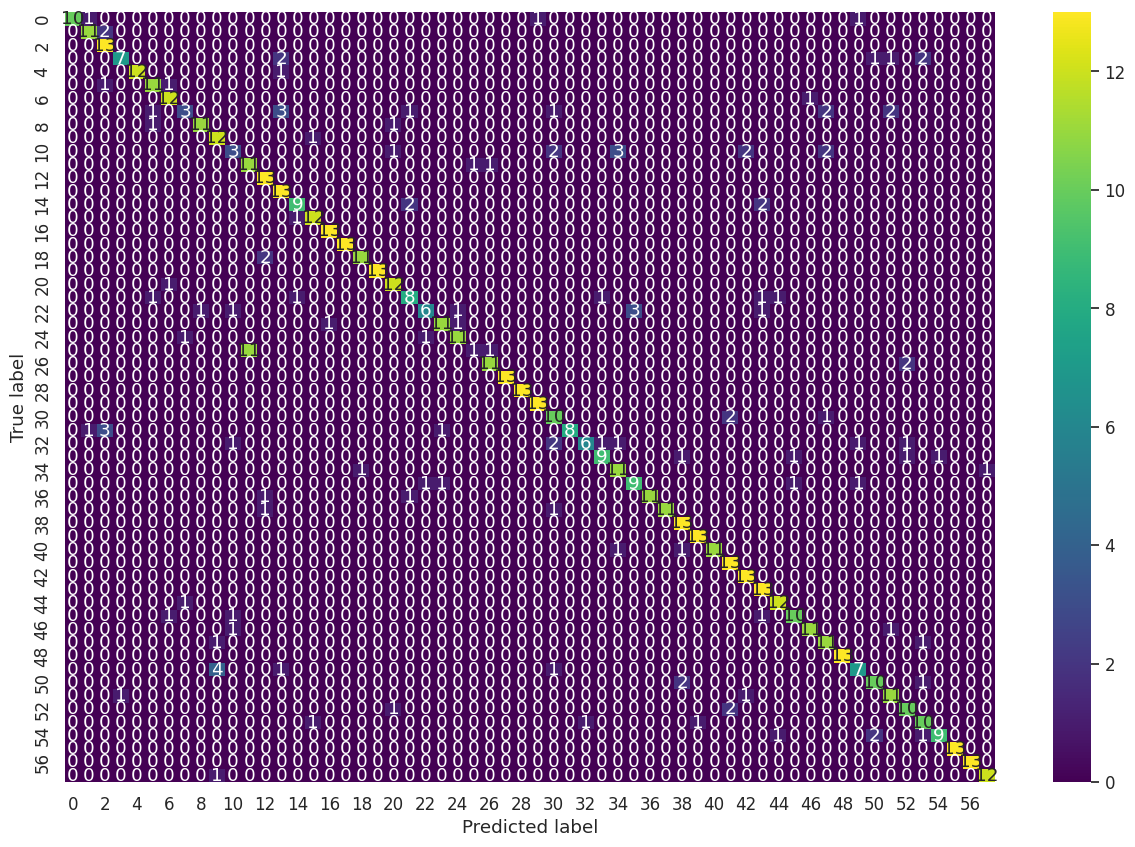

In [77]:
 print_confusion_matrix(y_true,y_pred)